<a href="https://colab.research.google.com/github/CiaThing/Netflix_Movie_Analytics/blob/main/Data_Analyst_Netflix_Movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from google.colab import files
uploaded = files.upload()

In [23]:
import pandas as pd
nf = pd.read_csv("netflix_dataset.csv", index_col=0)
print(nf.shape)
nf.head(100)

(8807, 11)


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
s96,TV Show,The Circle,NaN,Michelle Buteau,"United States, United Kingdom","September 8, 2021",2021,TV-MA,3 Seasons,Reality TV,Status and strategy collide in this social exp...
s97,Movie,If I Leave Here Tomorrow: A Film About Lynyrd ...,Stephen Kijak,"Ronnie Van Zandt, Gary Rossington, Allen Colli...",United States,"September 7, 2021",2018,TV-MA,97 min,"Documentaries, Music & Musicals","Using interviews and archival footage, this do..."
s98,TV Show,Kid Cosmic,NaN,"Jack Fisher, Tom Kenny, Amanda C. Miller, Kim ...",United States,"September 7, 2021",2021,TV-Y7,2 Seasons,"Kids' TV, TV Comedies, TV Sci-Fi & Fantasy",A boy's superhero dreams come true when he fin...


In [24]:
# Mengeksplorasi variasi berdasarkan 'type'
type_counts = nf['type'].value_counts()

# Mengeksplorasi variasi berdasarkan 'country'
country_counts = nf['country'].value_counts().head(10)  # Menampilkan 10 negara teratas

# Mengeksplorasi variasi berdasarkan 'listed_in'
listed_in_counts = nf['listed_in'].value_counts().head(10)  # Menampilkan 10 kategori teratas


In [25]:
# Menampilkan hasil
print("Variasi berdasarkan 'type':")
print(type_counts)

Variasi berdasarkan 'type':
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [26]:
print("\nVariasi berdasarkan 'country':")
print(country_counts)


Variasi berdasarkan 'country':
country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


In [27]:
print("\nVariasi berdasarkan 'listed_in':")
print(listed_in_counts)


Variasi berdasarkan 'listed_in':
listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64


In [28]:
import plotly.express as px

# Visualisasi variasi berdasarkan 'type'
fig_type_counts = px.bar(type_counts, title="Variasi berdasarkan 'type'")
fig_type_counts.show()


In [29]:
# Visualisasi variasi berdasarkan 'country'
fig_country_counts = px.bar(country_counts, title="10 Negara Teratas berdasarkan 'country'")
fig_country_counts.show()

In [30]:
# Visualisasi variasi berdasarkan 'listed_in'
fig_listed_in_counts = px.bar(listed_in_counts, title="10 Kategori Teratas berdasarkan 'listed_in'")
fig_listed_in_counts.show()

In [31]:
!pip install nltk wordcloud



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


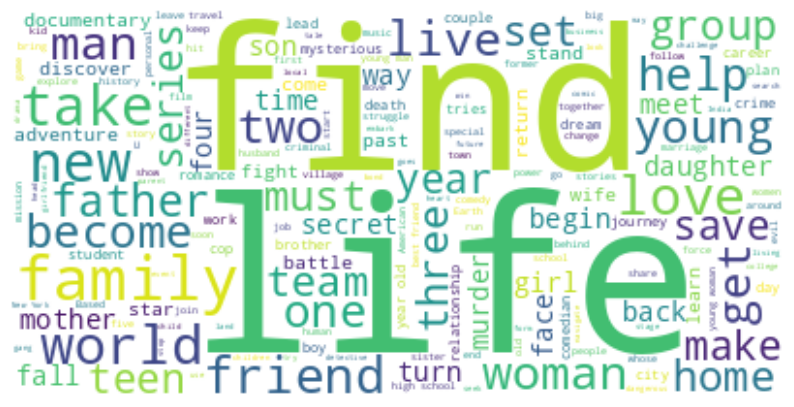

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

# Membaca data
nf = pd.read_csv("netflix_dataset.csv", index_col=0)

# Menggabungkan semua deskripsi menjadi satu teks panjang
text = " ".join(description for description in nf.description.dropna())

# Menghapus stop words
stop_words = set(stopwords.words('english'))
wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)

# Visualisasi word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [33]:
# Memproses data: Ekstrak tahun dari kolom 'date_added'
# Mengabaikan baris dengan nilai NaN di 'date_added'
nf = nf.dropna(subset=['date_added'])
nf['date_added'] = pd.to_datetime(nf['date_added'], errors='coerce')
nf = nf.dropna(subset=['date_added'])  # Menghapus baris yang tidak dapat diubah menjadi tanggal
nf['year_added'] = nf['date_added'].dt.year


<ipython-input-33-c537cce9d02b>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
# Analisis Berdasarkan Genre
# Memisahkan genre yang terpisah oleh koma
nf_genres = nf.dropna(subset=['listed_in'])
nf_genres = nf_genres.assign(listed_in=nf_genres['listed_in'].str.split(', '))
nf_genres = nf_genres.explode('listed_in')

# Menghitung jumlah film dan acara TV per genre per tahun
genre_counts = nf_genres.groupby(['year_added', 'listed_in']).size().reset_index(name='count')

# Visualisasi genre per tahun
fig_genre = px.line(genre_counts, x='year_added', y='count', color='listed_in', title="Investasi Netflix dalam Genre per Tahun")
fig_genre.show()


In [35]:
# Analisis Berdasarkan Rating
# Menghitung jumlah film dan acara TV per rating per tahun
rating_counts = nf.groupby(['year_added', 'rating']).size().reset_index(name='count')

# Visualisasi rating per tahun
fig_rating = px.line(rating_counts, x='year_added', y='count', color='rating', title="Investasi Netflix dalam Kelompok Usia per Tahun")
fig_rating.show()